In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes_data_upload.csv")

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [6]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

for column in df.columns[1:]:
    df[column]= label_encoder.fit_transform(df[column])

In [7]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [8]:
ages = df["Age"]

In [9]:
# normalization 
df["Age"] = (ages - np.min(ages))/(np.max(ages)-np.min(ages))
df["Age"].head(10)

0    0.324324
1    0.567568
2    0.337838
3    0.391892
4    0.594595
5    0.527027
6    0.554054
7    0.675676
8    0.689189
9    0.729730
Name: Age, dtype: float64

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)


SVC(random_state=0)

# Individual Base model

SVM Test Set Metrics:
Test Accuracy: 0.9461538461538461
Test Precision: 0.935064935064935
Test Sensitivity (Recall): 0.972972972972973
Test Specificity: 0.9107142857142857
Test F1 Score: 0.9536423841059603
Test Matthews Correlation Coefficient: 0.8904820493165743
Test Confusion Matrix:
 [[51  5]
 [ 2 72]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       0.94      0.97      0.95        74

    accuracy                           0.95       130
   macro avg       0.95      0.94      0.94       130
weighted avg       0.95      0.95      0.95       130


Random Forest Test Set Metrics:
Test Accuracy: 0.9846153846153847
Test Precision: 0.9864864864864865
Test Sensitivity (Recall): 0.9864864864864865
Test Specificity: 0.9821428571428571
Test F1 Score: 0.9864864864864865
Test Matthews Correlation Coefficient: 0.9686293436293436
Test Confusion Matrix:
 [[55  1]
 [ 1 73]]
Test Classificati

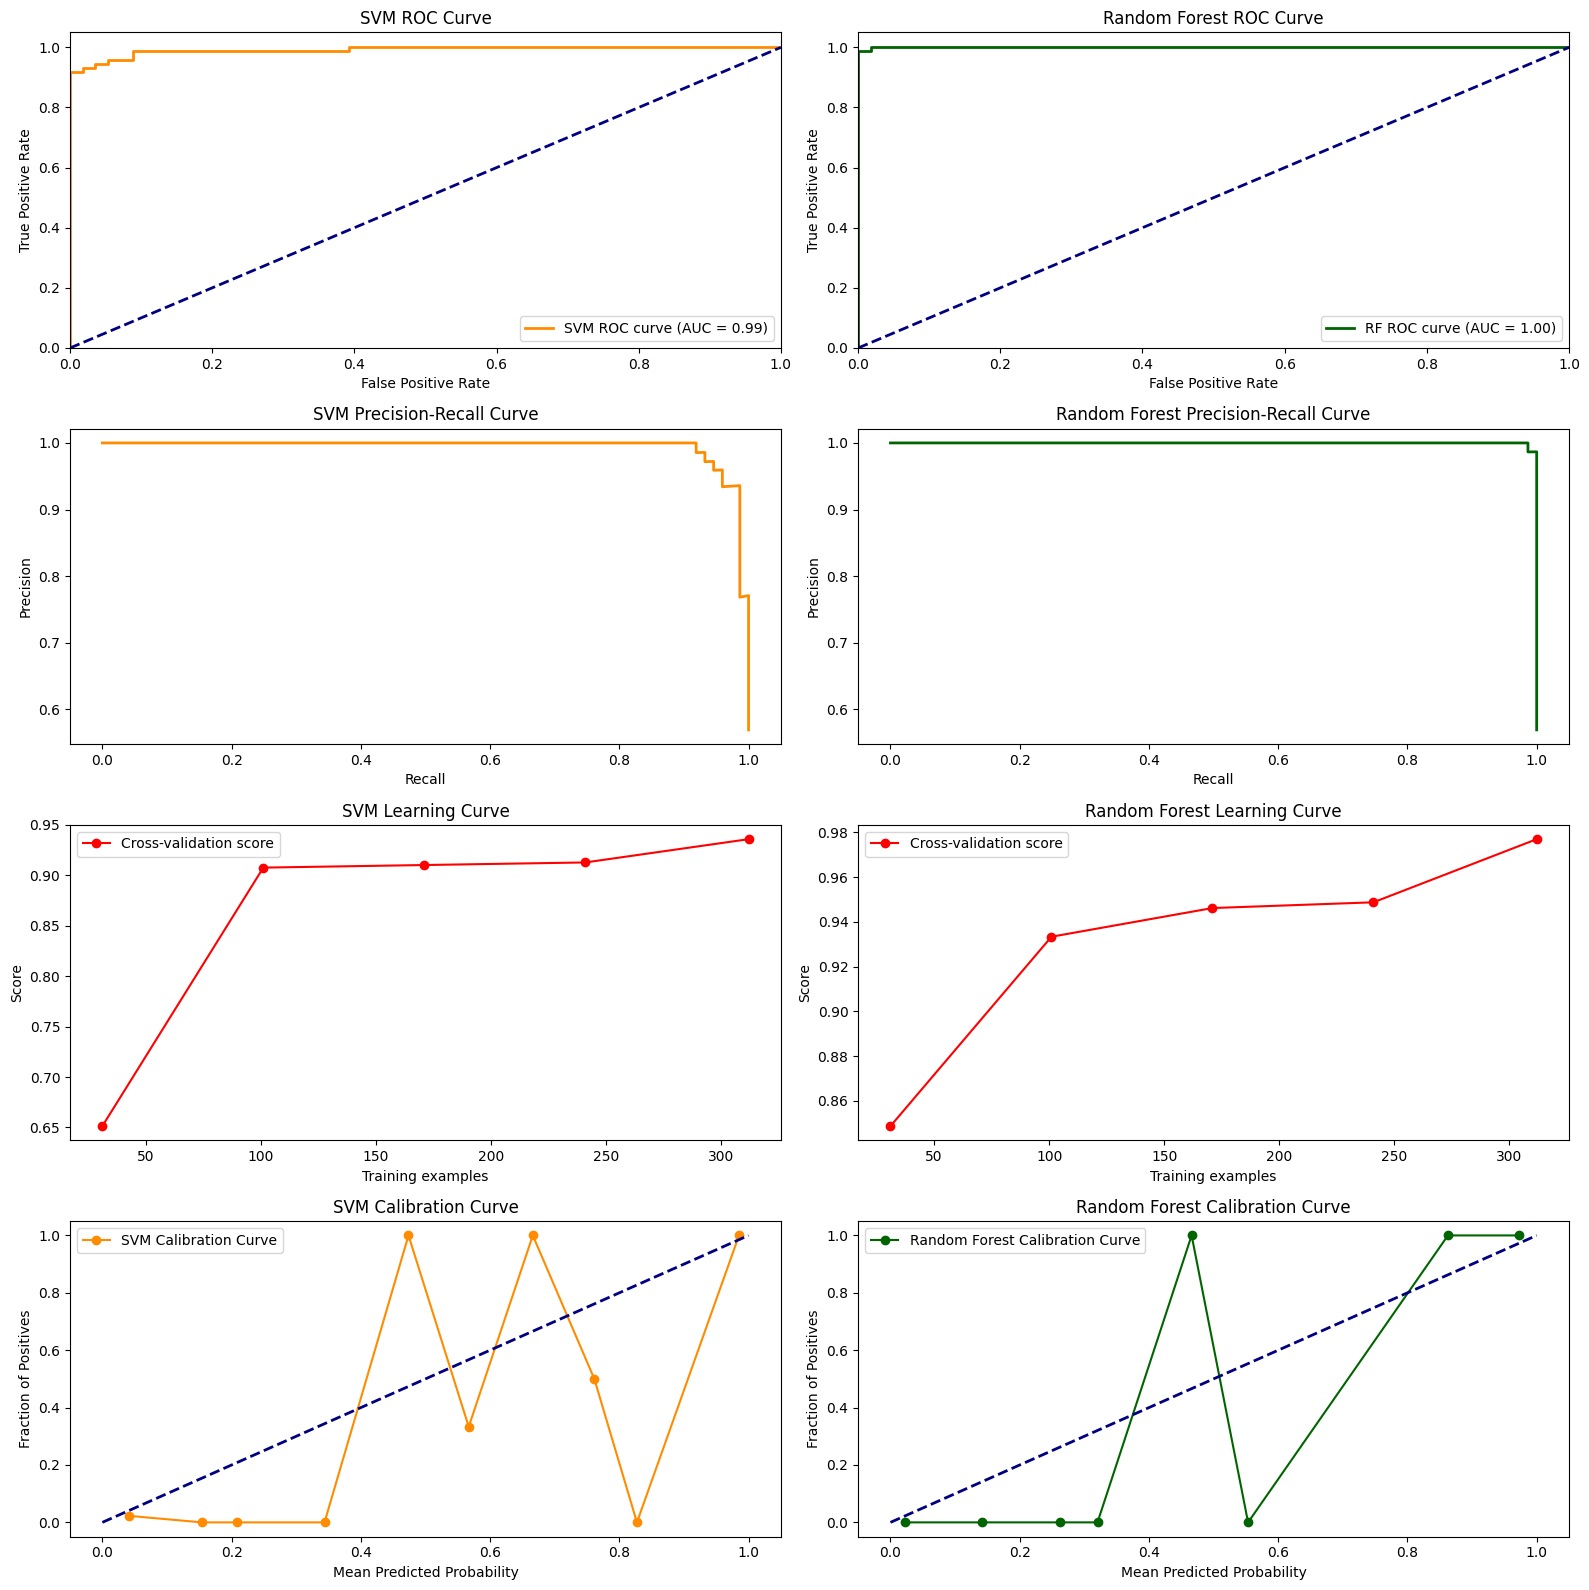

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

# Define and fit models
svm = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)

# Predict probabilities for SVM and Random Forest
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ---- Metrics for SVM ----
pre_test_svm = svm.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, pre_test_svm)
conf_matrix_test_svm = confusion_matrix(y_test, pre_test_svm)
precision_test_svm = precision_score(y_test, pre_test_svm, average='binary')
sensitivity_test_svm = recall_score(y_test, pre_test_svm, average='binary')
specificity_test_svm = conf_matrix_test_svm[0, 0] / (conf_matrix_test_svm[0, 0] + conf_matrix_test_svm[0, 1])
f1_test_svm = f1_score(y_test, pre_test_svm, average='binary')
mcc_test_svm = matthews_corrcoef(y_test, pre_test_svm)

print("SVM Test Set Metrics:")
print(f"Test Accuracy: {accuracy_test_svm}")
print(f"Test Precision: {precision_test_svm}")
print(f"Test Sensitivity (Recall): {sensitivity_test_svm}")
print(f"Test Specificity: {specificity_test_svm}")
print(f"Test F1 Score: {f1_test_svm}")
print(f"Test Matthews Correlation Coefficient: {mcc_test_svm}")
print("Test Confusion Matrix:\n", conf_matrix_test_svm)
print("Test Classification Report:\n", classification_report(y_test, pre_test_svm))

# ---- Metrics for Random Forest ----
pre_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, pre_test_rf)
conf_matrix_test_rf = confusion_matrix(y_test, pre_test_rf)
precision_test_rf = precision_score(y_test, pre_test_rf, average='binary')
sensitivity_test_rf = recall_score(y_test, pre_test_rf, average='binary')
specificity_test_rf = conf_matrix_test_rf[0, 0] / (conf_matrix_test_rf[0, 0] + conf_matrix_test_rf[0, 1])
f1_test_rf = f1_score(y_test, pre_test_rf, average='binary')
mcc_test_rf = matthews_corrcoef(y_test, pre_test_rf)

print("\nRandom Forest Test Set Metrics:")
print(f"Test Accuracy: {accuracy_test_rf}")
print(f"Test Precision: {precision_test_rf}")
print(f"Test Sensitivity (Recall): {sensitivity_test_rf}")
print(f"Test Specificity: {specificity_test_rf}")
print(f"Test F1 Score: {f1_test_rf}")
print(f"Test Matthews Correlation Coefficient: {mcc_test_rf}")
print("Test Confusion Matrix:\n", conf_matrix_test_rf)
print("Test Classification Report:\n", classification_report(y_test, pre_test_rf))

# ---- ROC Curve with AUC for SVM and Random Forest ----
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# ---- Precision-Recall Curve for SVM and Random Forest ----
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# ---- Learning Curve for SVM and Random Forest ----
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(svm, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean_svm = np.mean(train_scores_svm, axis=1)
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(rf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)

# ---- Calibration Curve for SVM and Random Forest ----
fraction_of_positives_svm, mean_predicted_value_svm = calibration_curve(y_test, y_prob_svm, n_bins=10)
fraction_of_positives_rf, mean_predicted_value_rf = calibration_curve(y_test, y_prob_rf, n_bins=10)

# ---- Plotting All Curves ----
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

# 1. ROC Curve for SVM
axs[0, 0].plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('SVM ROC Curve')
axs[0, 0].legend(loc="lower right")

# 2. ROC Curve for Random Forest
axs[0, 1].plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Random Forest ROC Curve')
axs[0, 1].legend(loc="lower right")

# 3. Precision-Recall Curve for SVM
axs[1, 0].plot(recall_svm, precision_svm, lw=2, color='darkorange')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('SVM Precision-Recall Curve')

# 4. Precision-Recall Curve for Random Forest
axs[1, 1].plot(recall_rf, precision_rf, lw=2, color='darkgreen')
axs[1, 1].set_xlabel('Recall')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_title('Random Forest Precision-Recall Curve')

# 5. Learning Curve for SVM
axs[2, 0].plot(train_sizes_svm, test_scores_mean_svm, 'o-', color='red', label='Cross-validation score')
axs[2, 0].set_xlabel('Training examples')
axs[2, 0].set_ylabel('Score')
axs[2, 0].set_title('SVM Learning Curve')
axs[2, 0].legend(loc="best")

# 6. Learning Curve for Random Forest
axs[2, 1].plot(train_sizes_rf, test_scores_mean_rf, 'o-', color='red', label='Cross-validation score')
axs[2, 1].set_xlabel('Training examples')
axs[2, 1].set_ylabel('Score')
axs[2, 1].set_title('Random Forest Learning Curve')
axs[2, 1].legend(loc="best")


# 7. Calibration Curve for SVM
axs[3, 0].plot(mean_predicted_value_svm, fraction_of_positives_svm, marker='o', color='darkorange', label='SVM Calibration Curve')
axs[3, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3, 0].set_xlabel('Mean Predicted Probability')
axs[3, 0].set_ylabel('Fraction of Positives')
axs[3, 0].set_title('SVM Calibration Curve')
axs[3, 0].legend(loc="best")

# 8. Calibration Curve for Random Forest
axs[3, 1].plot(mean_predicted_value_rf, fraction_of_positives_rf, marker='o', color='darkgreen', label='Random Forest Calibration Curve')
axs[3, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3, 1].set_xlabel('Mean Predicted Probability')
axs[3, 1].set_ylabel('Fraction of Positives')
axs[3, 1].set_title('Random Forest Calibration Curve')
axs[3, 1].legend(loc="best")


plt.tight_layout()
plt.show()


# voting classifier to combine SVM and Random Forest with evaluation ***

Voting Classifier Test Metrics:
Accuracy: 0.9846153846153847
Precision: 0.9864864864864865
Sensitivity (Recall): 0.9864864864864865
Specificity: 0.9821428571428571
F1 Score: 0.9864864864864865
Matthews Correlation Coefficient: 0.9686293436293436
Confusion Matrix:
 [[55  1]
 [ 1 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.99      0.99      0.99        74

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



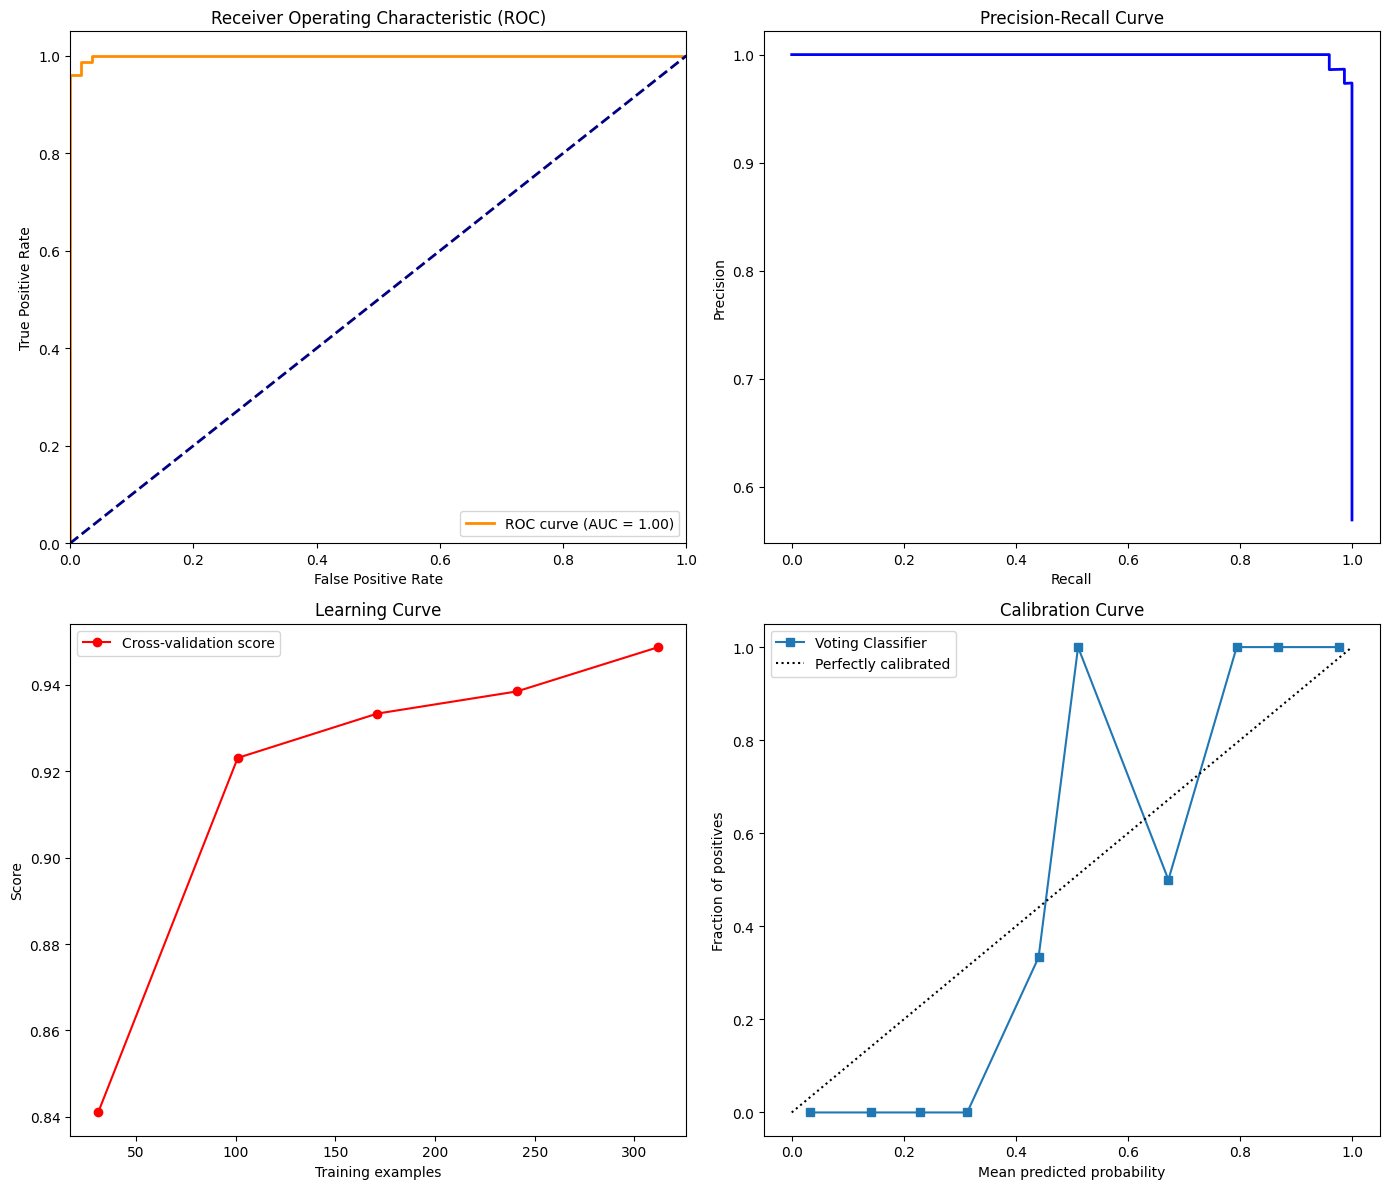

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the voting classifier
voting_clf = VotingClassifier(estimators=base_models, voting='soft')  # Use soft voting to get probabilities

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predict probabilities for ROC, Precision-Recall, and Calibration curve
y_prob = voting_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = voting_clf.predict(X_test)

# ---- Metrics Calculation ----
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Print metrics
print("Voting Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- ROC Curve with AUC ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# ---- Calibration Curve ----
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# ---- Plotting All Curves Together ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic (ROC)')
axs[0, 0].legend(loc="lower right")

# 2. Precision-Recall Curve
axs[0, 1].plot(recall, precision, lw=2, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# 3. Learning Curve
axs[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
axs[1, 0].set_xlabel('Training examples')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_title('Learning Curve')
axs[1, 0].legend(loc="best")

# 4. Calibration Curve
axs[1, 1].plot(mean_predicted_value, fraction_of_positives, "s-", label="Voting Classifier")
axs[1, 1].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axs[1, 1].set_xlabel('Mean predicted probability')
axs[1, 1].set_ylabel('Fraction of positives')
axs[1, 1].set_title('Calibration Curve')
axs[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


# Cross-Validation with Voting Classifier

In [152]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation
# cv_scores = cross_val_score(voting_clf, X, y, cv=5)  # 5-fold cross-validation

# print(f'Cross-validated accuracy scores: {cv_scores}')
# print(f'Mean cross-validated accuracy: {cv_scores.mean()}')


# Stacking Classifier to combine multiple models***

In [153]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

# Define the base estimators
estimators = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the final estimator (neural network)
final_estimator = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), solver='adam', random_state=0)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

# Fit the model
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
sensitivity = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

# Print metrics
print("Stacking Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))


Stacking Classifier Test Metrics:
Accuracy: 0.9923076923076923
Precision: 0.9866666666666667
Sensitivity (Recall): 1.0
Specificity: 0.9821428571428571
F1 Score: 0.9932885906040269
Matthews Correlation Coefficient: 0.9844021632684575
Confusion Matrix:
 [[55  1]
 [ 0 74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.99      1.00      0.99        74

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



C:\Users\gulam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Evaluation for combination of base model output by stacking layer

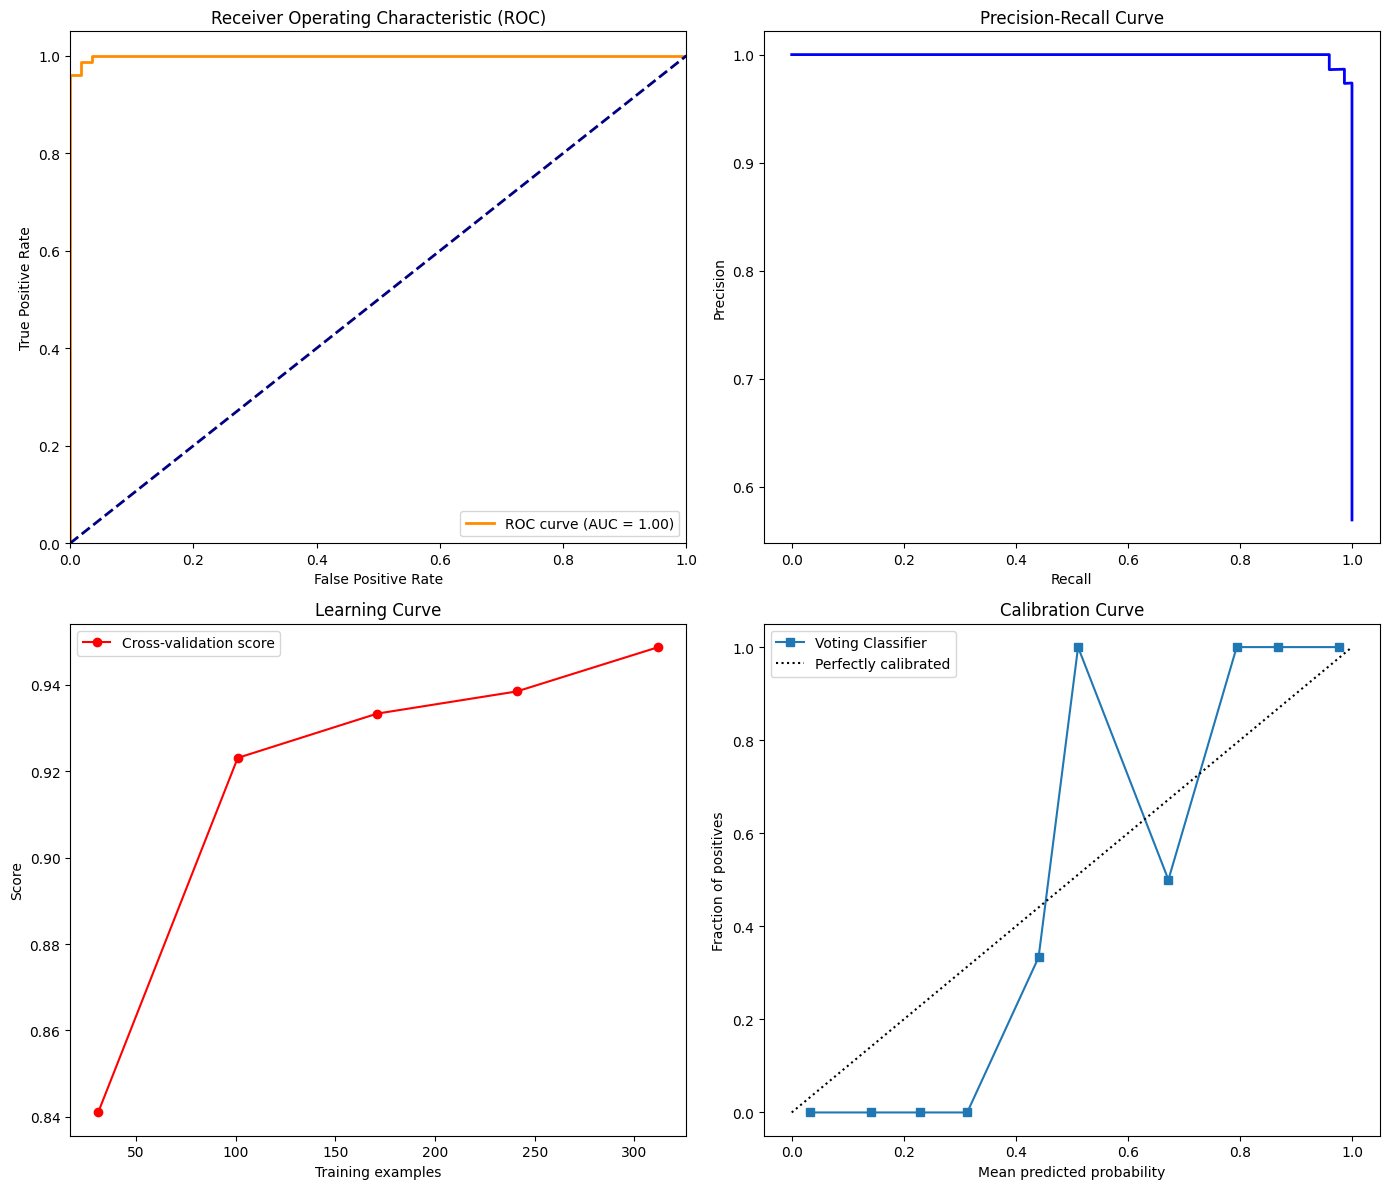

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, y_train, y_test are already defined

# Predict probabilities for ROC, Precision-Recall, and Calibration curve
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# ---- ROC Curve with AUC ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# ---- Calibration Curve ----
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# ---- Plotting All Curves Together ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic (ROC)')
axs[0, 0].legend(loc="lower right")

# 2. Precision-Recall Curve
axs[0, 1].plot(recall, precision, lw=2, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# 3. Learning Curve

axs[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
axs[1, 0].set_xlabel('Training examples')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_title('Learning Curve')
axs[1, 0].legend(loc="best")

# 4. Calibration Curve
axs[1, 1].plot(mean_predicted_value, fraction_of_positives, "s-", label="Voting Classifier")
axs[1, 1].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axs[1, 1].set_xlabel('Mean predicted probability')
axs[1, 1].set_ylabel('Fraction of positives')
axs[1, 1].set_title('Calibration Curve')
axs[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


# Evaluation Curve for Meta model Final Prediction

Final Meta-Model Test accuracy: 0.991304347826087
Precision: 1.0
Sensitivity (Recall): 0.9852941176470589
Specificity: 1.0
F1 Score: 0.9925925925925926
Matthews Correlation Coefficient: 0.9822256140331228
Confusion Matrix:
[[47  0]
 [ 1 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.99      0.99        68

    accuracy                           0.99       115
   macro avg       0.99      0.99      0.99       115
weighted avg       0.99      0.99      0.99       115



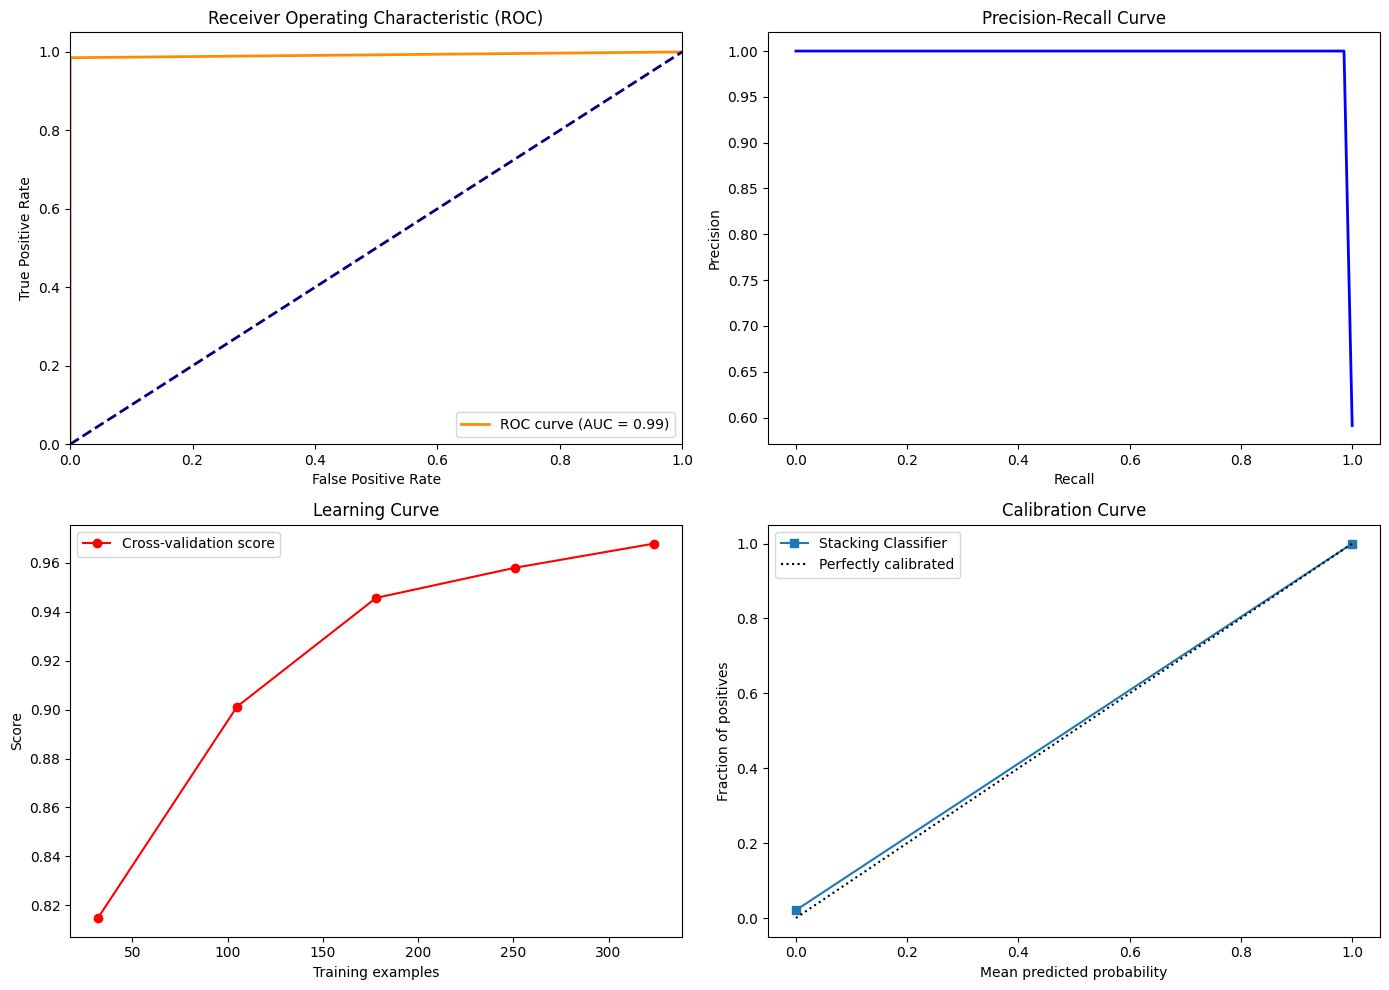

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Meta model (Choose one here)
meta_model1 = GradientBoostingClassifier()  # LogisticRegression(), MLPClassifier() can also be used

# Split data (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

# Fit base models and get predictions from them
base_train_preds = np.zeros((X_train.shape[0], len(base_models)))  # Collect training predictions for meta-model
base_test_preds = np.zeros((X_test.shape[0], len(base_models)))  # Collect test predictions for meta-model

for idx, (name, model) in enumerate(base_models):
    # Train the base model
    model.fit(X_train, y_train)
    
    # Get predictions on the training and test sets
    base_train_preds[:, idx] = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    base_test_preds[:, idx] = model.predict_proba(X_test)[:, 1]

# Fit the meta-model using the base model predictions as input features
meta_model1.fit(base_train_preds, y_train)

# Predict using the meta-model on the test data
final_predictions = meta_model1.predict(base_test_preds)
y_prob = meta_model1.predict_proba(base_test_preds)[:, 1]  # Probabilities for the positive class

# Compute various metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)  # Sensitivity
f1 = f1_score(y_test, final_predictions)
mcc = matthews_corrcoef(y_test, final_predictions)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, final_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Display the metrics
print(f'Final Meta-Model Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Sensitivity (Recall): {recall}')
print(f'Specificity: {specificity}')
print(f'F1 Score: {f1}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report(y_test, final_predictions))

# ---- Visualization Section ----

# Plot ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.subplot(2, 2, 2)
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(meta_model1, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.subplot(2, 2, 3)

plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")

# Plot Calibration Curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

plt.subplot(2, 2, 4)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Stacking Classifier")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc="best")

plt.tight_layout()
plt.show()


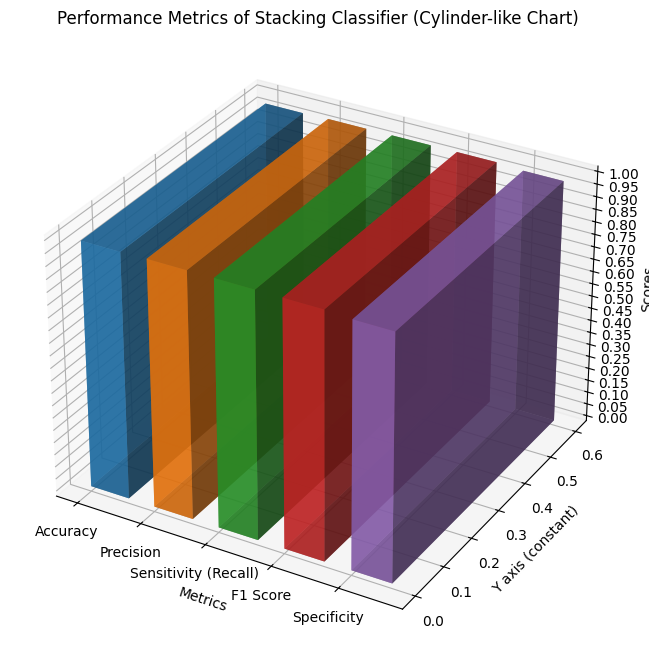

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix)

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the meta-model (Logistic Regression in this case)
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict using the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test)

# Compute various metrics
accuracy = accuracy_score(y_test, y_pred_stacking)
precision = precision_score(y_test, y_pred_stacking)
recall = recall_score(y_test, y_pred_stacking)  # Sensitivity
f1 = f1_score(y_test, y_pred_stacking)
mcc = matthews_corrcoef(y_test, y_pred_stacking)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Metrics for plotting
metrics = [accuracy, precision, recall, f1, specificity]
metrics_names = ['Accuracy', 'Precision', 'Sensitivity (Recall)', 'F1 Score', 'Specificity']

# Create a cylindrical-like bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define positions and size
x_pos = np.arange(len(metrics))
y_pos = np.zeros(len(metrics))
z_pos = np.zeros(len(metrics))

dx = np.ones(len(metrics)) * 0.6  # Width of the bars
dy = np.ones(len(metrics)) * 0.6  # Depth of the bars
dz = metrics  # Height of the bars

# Define colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, alpha=0.7)

# Labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Y axis (constant)')
ax.set_zlabel('Scores')
ax.set_title('Performance Metrics of Stacking Classifier (Cylinder-like Chart)')

# Set x-axis ticks and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics_names)

# Set z-axis range and ticks
ax.set_zlim(0, 1)
ax.set_zticks(np.arange(0, 1.05, 0.05))

plt.show()


# Risk Level Prediction

In [157]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from a specified path
df = pd.read_csv('diabetes_data_upload.csv')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns except the target 'class'
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define the symptom columns after label encoding
symptom_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                   'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                   'Alopecia', 'Obesity']

# Function to calculate the risk score
def calculate_risk_score(row):
    return row[symptom_columns].sum()

# Function to classify risk based on the risk score
def classify_risk_level(score):
    if score < 4:
        return 'Low Risk'
    elif score < 10:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Calculate Risk Score for all records where class == 1
df['Risk Score'] = df.apply(lambda row: calculate_risk_score(row) if row['class'] == 1 else None, axis=1)

# Classify Risk Level based on the calculated Risk Score
df['Risk Level'] = df.apply(lambda row: classify_risk_level(row['Risk Score']) if row['class'] == 1 else None, axis=1)

# Display the first 10 records of the updated DataFrame
print(df.head(10))

# Save the entire updated DataFrame to a CSV file
df.to_csv('diabetes_risk_levels.csv', index=False)

print("The updated dataset with risk levels has been saved to 'diabetes_risk_levels.csv'.")


   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   16       1         0           1                   0         1   
1   34       1         0           0                   0         1   
2   17       1         1           0                   0         1   
3   21       1         0           0                   1         1   
4   36       1         1           1                   1         1   
5   31       1         1           1                   0         1   
6   33       1         1           1                   0         1   
7   42       1         1           1                   1         1   
8   43       1         1           1                   0         1   
9   46       1         0           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2         

# Risk Level Prediction with Age consideration 

In [158]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from a specified path
df = pd.read_csv('diabetes_data_upload.csv')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns except the target 'class'
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define the symptom columns and consider age in risk calculation
symptom_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                   'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                   'Alopecia', 'Obesity']

# Function to calculate the risk score
def calculate_risk_score(row):
    age_factor = row['Age'] / 10  # Example: age is scaled down by a factor of 10
    symptom_score = row[symptom_columns].sum()
    return symptom_score + age_factor

# Function to classify risk based on the risk score
def classify_risk_level(score):
    if score < 5:
        return 'Low Risk'
    elif score < 12:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Calculate Risk Score for all records where class == 1
df['Risk Score'] = df.apply(lambda row: calculate_risk_score(row) if row['class'] == 1 else None, axis=1)

# Classify Risk Level based on the calculated Risk Score
df['Risk Level'] = df.apply(lambda row: classify_risk_level(row['Risk Score']) if row['class'] == 1 else None, axis=1)

# Display the first 10 records of the updated DataFrame
print(df.head(10))

# Save the entire updated DataFrame to a CSV file
df.to_csv('diabetes_risk_levels_with_age.csv', index=False)

print("The updated dataset with risk levels has been saved to 'diabetes_risk_levels_with_age.csv'.")


   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   16       1         0           1                   0         1   
1   34       1         0           0                   0         1   
2   17       1         1           0                   0         1   
3   21       1         0           0                   1         1   
4   36       1         1           1                   1         1   
5   31       1         1           1                   0         1   
6   33       1         1           1                   0         1   
7   42       1         1           1                   1         1   
8   43       1         1           1                   0         1   
9   46       1         0           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2         

# Normalize age visualization  

C:\Users\gulam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


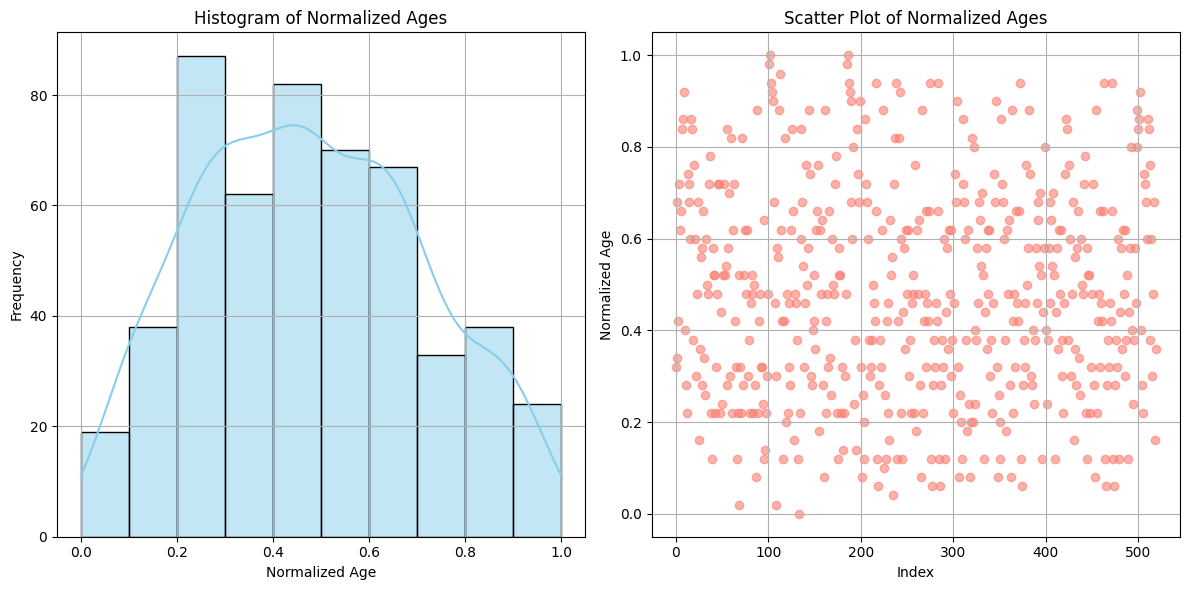

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Sample DataFrame creation
# df = pd.DataFrame({'Age': [23, 45, 35, 50, 30, 22, 39, 41, 48, 52]})

# Normalize the 'Age' column
ages = df["Age"]
df["Age_Normalized"] = (ages - np.min(ages)) / (np.max(ages) - np.min(ages))





plt.figure(figsize=(12, 6))

# Plot histogram
plt.subplot(1, 2, 1)
sns.histplot(df["Age_Normalized"], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Normalized Ages')
plt.xlabel('Normalized Age')
plt.ylabel('Frequency')
plt.grid(True)

# Plot scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df.index, df["Age_Normalized"], color='salmon', alpha=0.6)
plt.title('Scatter Plot of Normalized Ages')
plt.xlabel('Index')
plt.ylabel('Normalized Age')
plt.grid(True)

plt.tight_layout()
plt.show()


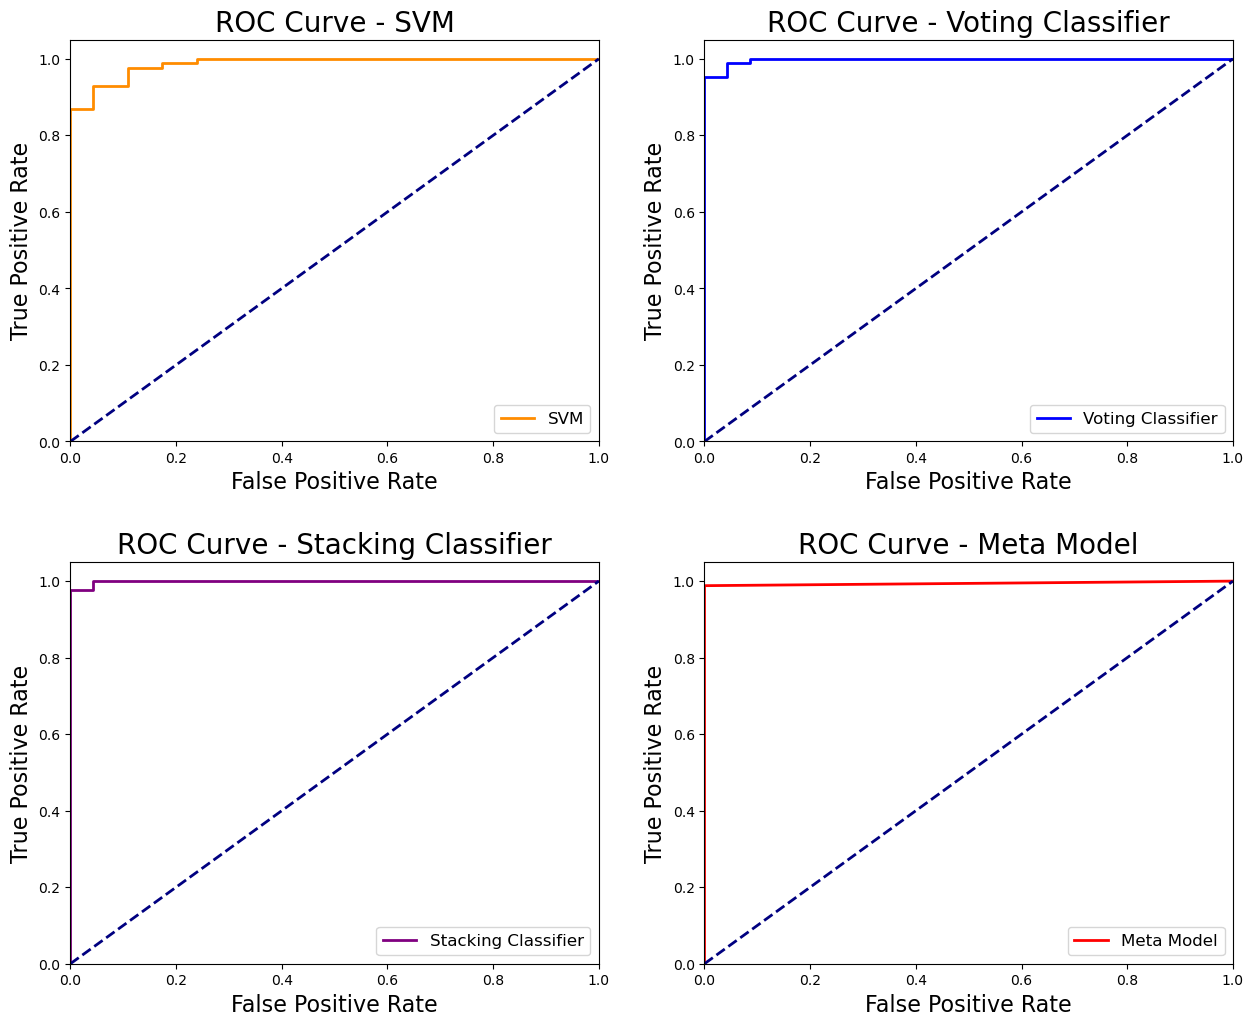

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.ensemble import VotingClassifier, StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define base models for stacking and meta-model
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)
rf_model = RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
log_model = LogisticRegression(random_state=0)

# Fit individual models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train, y_train)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], final_estimator=log_model)
stacking_clf.fit(X_train, y_train)

# Define base models for the meta-model
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Meta model
meta_model1 = GradientBoostingClassifier()

# Fit base models and get predictions from them
base_train_preds = np.zeros((X_train.shape[0], len(base_models)))  # Collect training predictions for meta-model
base_test_preds = np.zeros((X_test.shape[0], len(base_models)))  # Collect test predictions for meta-model

for idx, (name, model) in enumerate(base_models):
    # Train the base model
    model.fit(X_train, y_train)
    
    # Get predictions on the training and test sets
    base_train_preds[:, idx] = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    base_test_preds[:, idx] = model.predict_proba(X_test)[:, 1]

# Fit the meta-model using the base model predictions as input features
meta_model1.fit(base_train_preds, y_train)

# Predict probabilities for ROC
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]
y_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]
y_prob_meta = meta_model1.predict_proba(base_test_preds)[:, 1]

# ---- ROC Curves ----
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_prob_voting)
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_prob_stacking)
fpr_meta, tpr_meta, _ = roc_curve(y_test, y_prob_meta)

# ---- Plotting Individual ROC Curves ----
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# SVM ROC Curve
axes[0].plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate', fontsize=16)
axes[0].set_ylabel('True Positive Rate', fontsize=16)
axes[0].set_title('ROC Curve - SVM', fontsize=20)
axes[0].legend(loc="lower right",fontsize=12)

# Voting Classifier ROC Curve
axes[1].plot(fpr_voting, tpr_voting, color='blue', lw=2, label=f'Voting Classifier')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=16)
axes[1].set_ylabel('True Positive Rate', fontsize=16)
axes[1].set_title('ROC Curve - Voting Classifier', fontsize=20)
axes[1].legend(loc="lower right",fontsize=12)

# Stacking Classifier ROC Curve
axes[2].plot(fpr_stacking, tpr_stacking, color='purple', lw=2, label=f'Stacking Classifier')
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate', fontsize=16)
axes[2].set_ylabel('True Positive Rate', fontsize=16)
axes[2].set_title('ROC Curve - Stacking Classifier', fontsize=20)
axes[2].legend(loc="lower right",fontsize=12)

# Meta Model ROC Curve
axes[3].plot(fpr_meta, tpr_meta, color='red', lw=2, label=f'Meta Model')
axes[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[3].set_xlim([0.0, 1.0])
axes[3].set_ylim([0.0, 1.05])
axes[3].set_xlabel('False Positive Rate', fontsize=16)
axes[3].set_ylabel('True Positive Rate', fontsize=16)
axes[3].set_title('ROC Curve - Meta Model', fontsize=20)
axes[3].legend(loc="lower right",fontsize=12)

# Adjust layout
plt.subplots_adjust(hspace=0.3) 

plt.show()


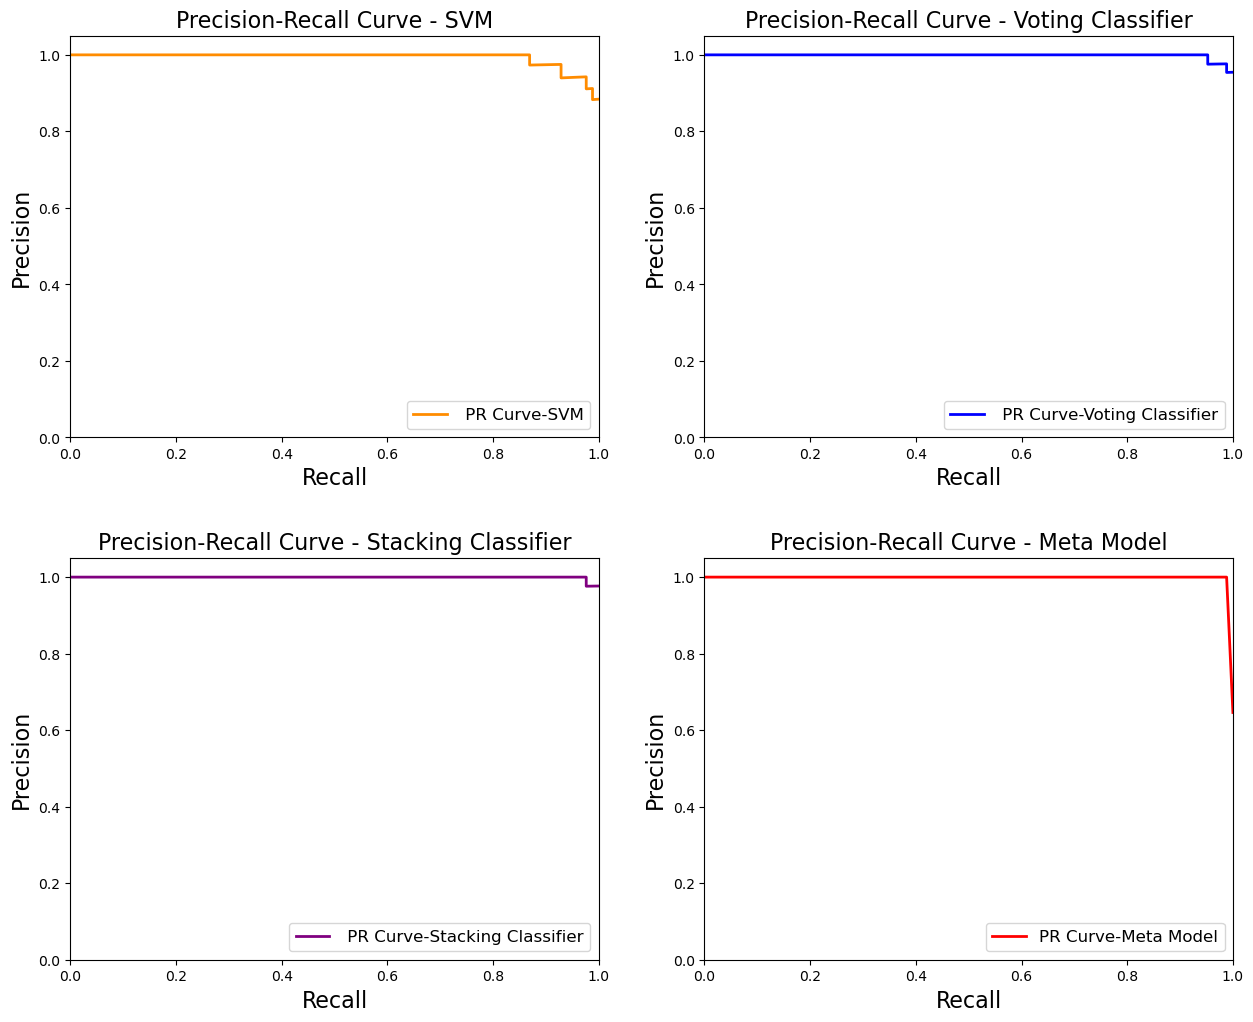

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_recall_curve, accuracy_score, 
                             precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix)
from sklearn.ensemble import (VotingClassifier, RandomForestClassifier, StackingClassifier, 
                              GradientBoostingClassifier)
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define base models for stacking and meta-model
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)
rf_model = RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
log_model = LogisticRegression(random_state=0)

# Fit individual models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train, y_train)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], final_estimator=log_model)
stacking_clf.fit(X_train, y_train)

# Define base models for the meta-model
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Meta model (Choose one here)
meta_model1 = GradientBoostingClassifier()  # Change as needed

# Fit base models and get predictions from them
base_train_preds = np.zeros((X_train.shape[0], len(base_models)))  # Collect training predictions for meta-model
base_test_preds = np.zeros((X_test.shape[0], len(base_models)))  # Collect test predictions for meta-model

for idx, (name, model) in enumerate(base_models):
    # Train the base model
    model.fit(X_train, y_train)
    
    # Get predictions on the training and test sets
    base_train_preds[:, idx] = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    base_test_preds[:, idx] = model.predict_proba(X_test)[:, 1]

# Fit the meta-model using the base model predictions as input features
meta_model1.fit(base_train_preds, y_train)

# Predict using the meta-model on the test data
final_predictions = meta_model1.predict(base_test_preds)
y_prob_meta = meta_model1.predict_proba(base_test_preds)[:, 1]  # Probabilities for the positive class

# Predict probabilities for Precision-Recall curve
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]
y_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]

# ---- Precision-Recall Curves ----
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
precision_voting, recall_voting, _ = precision_recall_curve(y_test, y_prob_voting)
precision_stacking, recall_stacking, _ = precision_recall_curve(y_test, y_prob_stacking)
precision_meta, recall_meta, _ = precision_recall_curve(y_test, y_prob_meta)

# ---- Plotting Individual Precision-Recall Curves ----
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# SVM PR Curve
axes[0].plot(recall_svm, precision_svm, color='darkorange', lw=2, label=f' PR Curve-SVM')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('Recall' , fontsize=16)
axes[0].set_ylabel('Precision',fontsize=16)
axes[0].set_title('Precision-Recall Curve - SVM', fontsize=16)
axes[0].legend(loc="lower right",fontsize=12)

# Voting Classifier PR Curve
axes[1].plot(recall_voting, precision_voting, color='blue', lw=2, label=f' PR Curve-Voting Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall',fontsize=16)
axes[1].set_ylabel('Precision',fontsize=16)
axes[1].set_title('Precision-Recall Curve - Voting Classifier',fontsize=16)
axes[1].legend(loc="lower right",fontsize=12)

# Stacking Classifier PR Curve
axes[2].plot(recall_stacking, precision_stacking, color='purple', lw=2, label=f' PR Curve-Stacking Classifier')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('Recall',fontsize=16)
axes[2].set_ylabel('Precision',fontsize=16)
axes[2].set_title('Precision-Recall Curve - Stacking Classifier',fontsize=16)
axes[2].legend(loc="lower right",fontsize=12)

# Meta Model PR Curve
axes[3].plot(recall_meta, precision_meta, color='red', lw=2, label=f'PR Curve-Meta Model')
axes[3].set_xlim([0.0, 1.0])
axes[3].set_ylim([0.0, 1.05])
axes[3].set_xlabel('Recall',fontsize=16)
axes[3].set_ylabel('Precision',fontsize=16)
axes[3].set_title('Precision-Recall Curve - Meta Model',fontsize=16)
axes[3].legend(loc="lower right",fontsize=12)

# Adjust layout
plt.subplots_adjust(hspace=0.3) 


plt.show()


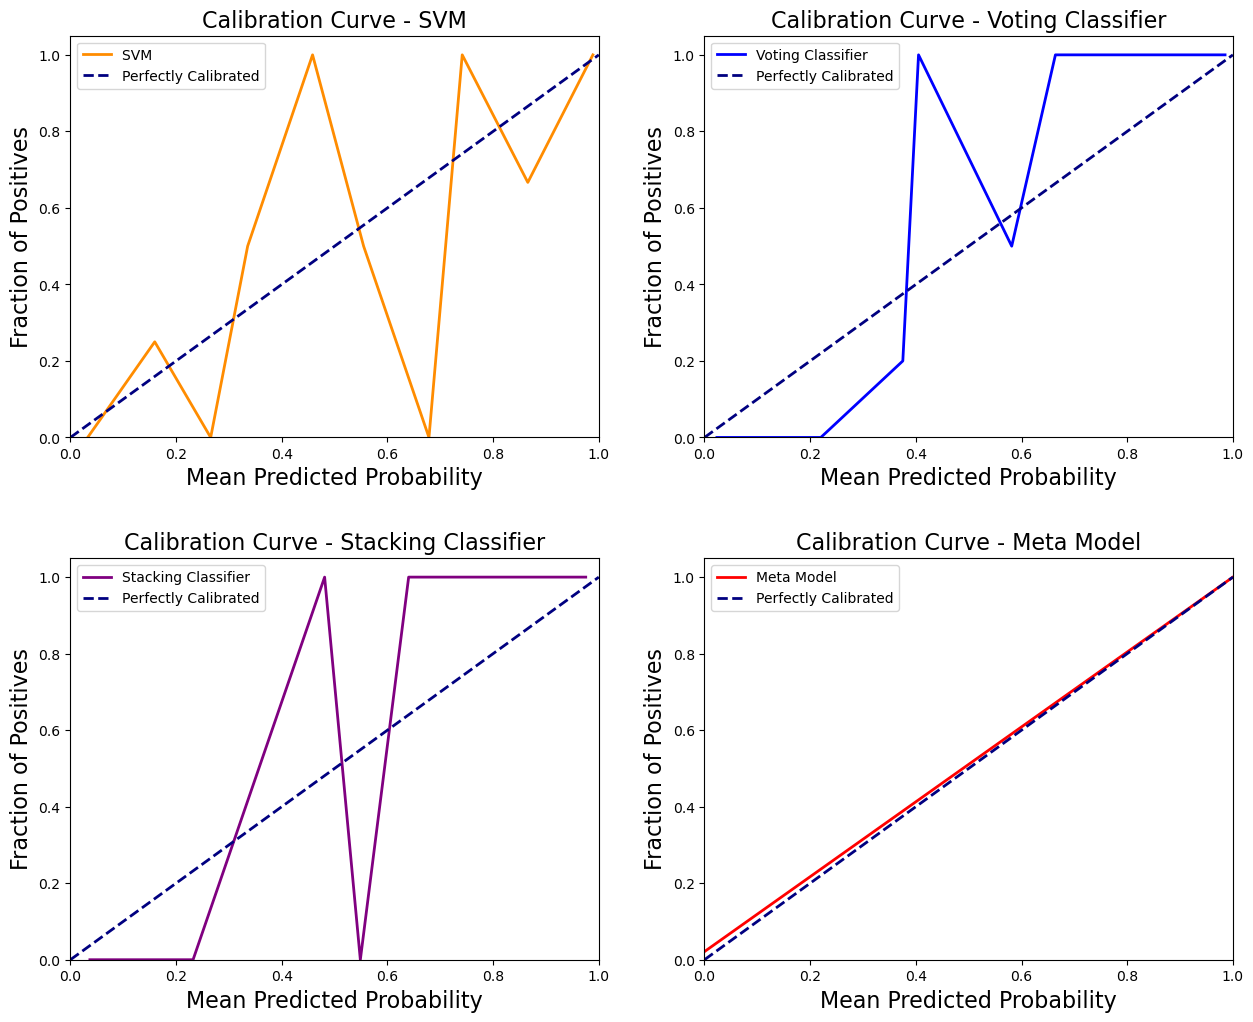

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import (VotingClassifier, RandomForestClassifier, StackingClassifier, 
                              GradientBoostingClassifier)
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve  # Import calibration curve

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define base models for stacking and meta-model
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)
rf_model = RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
log_model = LogisticRegression(random_state=0)

# Fit individual models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train, y_train)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], final_estimator=log_model)
stacking_clf.fit(X_train, y_train)

# Define base models for the meta-model
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Meta model (Choose one here)
meta_model1 = GradientBoostingClassifier()  # Change as needed

# Fit base models and get predictions from them
base_train_preds = np.zeros((X_train.shape[0], len(base_models)))  # Collect training predictions for meta-model
base_test_preds = np.zeros((X_test.shape[0], len(base_models)))  # Collect test predictions for meta-model

for idx, (name, model) in enumerate(base_models):
    # Train the base model
    model.fit(X_train, y_train)
    
    # Get predictions on the training and test sets
    base_train_preds[:, idx] = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    base_test_preds[:, idx] = model.predict_proba(X_test)[:, 1]

# Fit the meta-model using the base model predictions as input features
meta_model1.fit(base_train_preds, y_train)

# Predict probabilities for Calibration Curve
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]
y_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]
y_prob_meta = meta_model1.predict_proba(base_test_preds)[:, 1]

# ---- Calibration Curves ----
fraction_of_positives_svm, mean_predicted_value_svm = calibration_curve(y_test, y_prob_svm, n_bins=10)
fraction_of_positives_voting, mean_predicted_value_voting = calibration_curve(y_test, y_prob_voting, n_bins=10)
fraction_of_positives_stacking, mean_predicted_value_stacking = calibration_curve(y_test, y_prob_stacking, n_bins=10)
fraction_of_positives_meta, mean_predicted_value_meta = calibration_curve(y_test, y_prob_meta, n_bins=10)

# ---- Plotting Calibration Curves ----
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# SVM Calibration Curve
axes[0].plot(mean_predicted_value_svm, fraction_of_positives_svm, color='darkorange', lw=2, label=f'SVM ')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Perfectly Calibrated')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('Mean Predicted Probability', fontsize=16)
axes[0].set_ylabel('Fraction of Positives', fontsize=16)
axes[0].set_title('Calibration Curve - SVM', fontsize=16)
axes[0].legend(loc='upper left', fontsize=10)

# Voting Classifier Calibration Curve
axes[1].plot(mean_predicted_value_voting, fraction_of_positives_voting, color='blue', lw=2, label=f'Voting Classifier')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Perfectly Calibrated')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Mean Predicted Probability', fontsize=16)
axes[1].set_ylabel('Fraction of Positives', fontsize=16)
axes[1].set_title('Calibration Curve - Voting Classifier', fontsize=16)
axes[1].legend(loc='upper left', fontsize=10)

# Stacking Classifier Calibration Curve
axes[2].plot(mean_predicted_value_stacking, fraction_of_positives_stacking, color='purple', lw=2, label=f'Stacking Classifier ')
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Perfectly Calibrated')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('Mean Predicted Probability', fontsize=16)
axes[2].set_ylabel('Fraction of Positives', fontsize=16)
axes[2].set_title('Calibration Curve - Stacking Classifier', fontsize=16)
axes[2].legend(loc='upper left', fontsize=10)

# Meta Model Calibration Curve
axes[3].plot(mean_predicted_value_meta, fraction_of_positives_meta, color='red', lw=2, label=f'Meta Model ')
axes[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Perfectly Calibrated')
axes[3].set_xlim([0.0, 1.0])
axes[3].set_ylim([0.0, 1.05])
axes[3].set_xlabel('Mean Predicted Probability', fontsize=16)
axes[3].set_ylabel('Fraction of Positives', fontsize=16)
axes[3].set_title('Calibration Curve - Meta Model', fontsize=16)
axes[3].legend(loc='upper left', fontsize=10)


plt.subplots_adjust(hspace=0.3) 


# Adjust layout
plt.show()


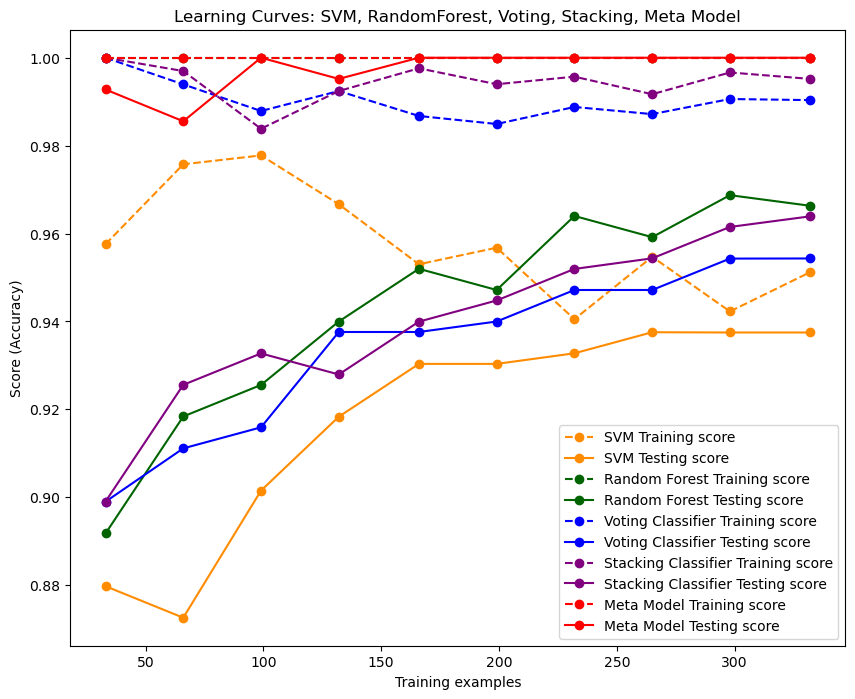

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import (VotingClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression

# Function to plot both training and testing learning curves
def plot_learning_curve(estimator, X_train, y_train, X_test, y_test, label, color, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o--', color=color, label=f'{label} Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color=color, label=f'{label} Testing score')

# Split the dataset into training and testing sets with 75% training and 25% testing
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.20, random_state=42)

# Setup cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the models
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)
rf_model = RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
log_model = LogisticRegression(random_state=0)

# Voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], voting='soft')

# Stacking classifier
stacking_clf = StackingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], final_estimator=log_model)

# Meta model
meta_model1 = GradientBoostingClassifier()

# Base models for meta-model
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Generate training set predictions for base models to train the meta-model
base_train_preds = np.zeros((X_train_split.shape[0], len(base_models)))
for idx, (name, model) in enumerate(base_models):
    model.fit(X_train_split, y_train_split)
    base_train_preds[:, idx] = model.predict_proba(X_train_split)[:, 1]

# Meta-model fitting using base model predictions
meta_model1.fit(base_train_preds, y_train_split)

# ---- Plot Learning Curves ----
plt.figure(figsize=(10, 8))

# Plot learning curve for SVM
plot_learning_curve(svm_model, X_train_split, y_train_split, X_test_split, y_test_split, label="SVM", color='darkorange', cv=cv)

# Plot learning curve for RandomForest
plot_learning_curve(rf_model, X_train_split, y_train_split, X_test_split, y_test_split, label="Random Forest", color='darkgreen', cv=cv)

# Plot learning curve for Voting Classifier
plot_learning_curve(voting_clf, X_train_split, y_train_split, X_test_split, y_test_split, label="Voting Classifier", color='blue', cv=cv)

# Plot learning curve for Stacking Classifier
plot_learning_curve(stacking_clf, X_train_split, y_train_split, X_test_split, y_test_split, label="Stacking Classifier", color='purple', cv=cv)

# Plot learning curve for Meta Model
# Generate base model predictions on the testing set for meta-model learning curve.
meta_model_test_preds = np.zeros((X_test_split.shape[0], len(base_models)))
for idx, (name, model) in enumerate(base_models):
    meta_model_test_preds[:, idx] = model.predict_proba(X_test_split)[:, 1]
plot_learning_curve(meta_model1, base_train_preds, y_train_split, meta_model_test_preds, y_test_split, label="Meta Model", color='red', cv=cv)

# Set labels, title, and legend
plt.xlabel('Training examples')
plt.ylabel('Score (Accuracy)')
plt.title('Learning Curves: SVM, RandomForest, Voting, Stacking, Meta Model')
plt.legend(loc="best")

# Show the plot
plt.show()


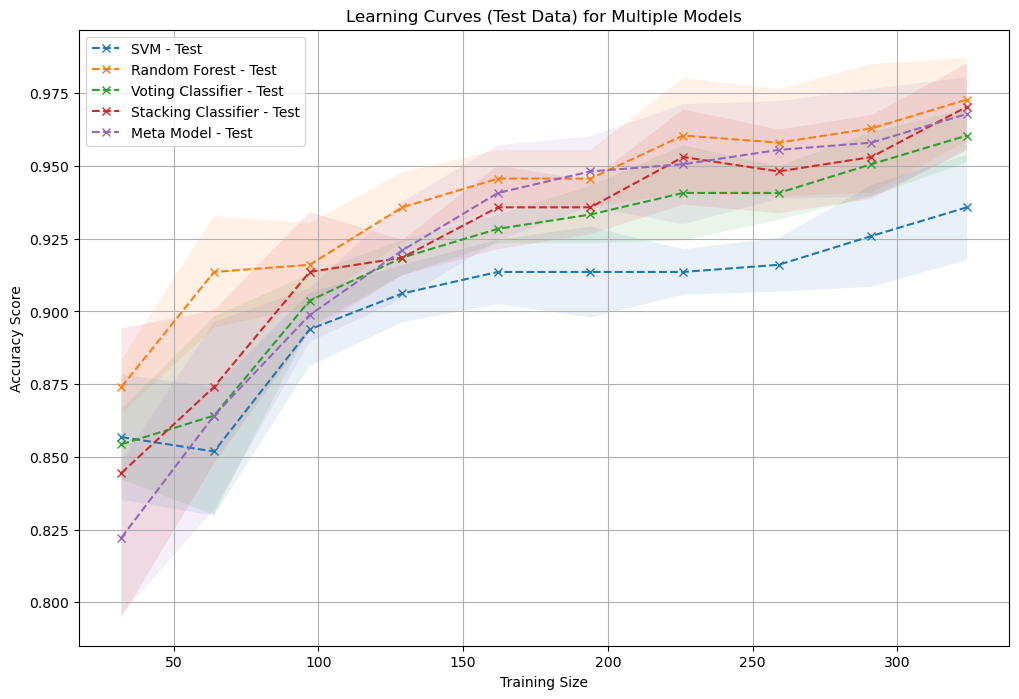

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import joblib  # Use joblib to load saved models

# Assuming you already have your dataset loaded as X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

# List of model filenames
model_filenames = ['svm_model.pkl', 'rf_model.pkl', 'voting_clf.pkl', 'stacking_clf.pkl', 'meta_model.pkl']
model_names = ['SVM', 'Random Forest', 'Voting Classifier', 'Stacking Classifier', 'Meta Model']

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through the models to load, compute, and plot learning curves
for filename, model_name in zip(model_filenames, model_names):
    # Load the model
    model = joblib.load(filename)

    # Compute learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        scoring='accuracy'  # You can change this to other metrics if needed
    )

    # Calculate the mean and standard deviation for test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curves for test scores only
    plt.plot(train_sizes, test_scores_mean, label=f'{model_name} - Test', linestyle='--', marker='x')

    # Plot the standard deviation as shaded areas
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves (Test Data) for Multiple Models')
plt.legend(loc='best')
plt.grid()

# Show the plot
plt.show()


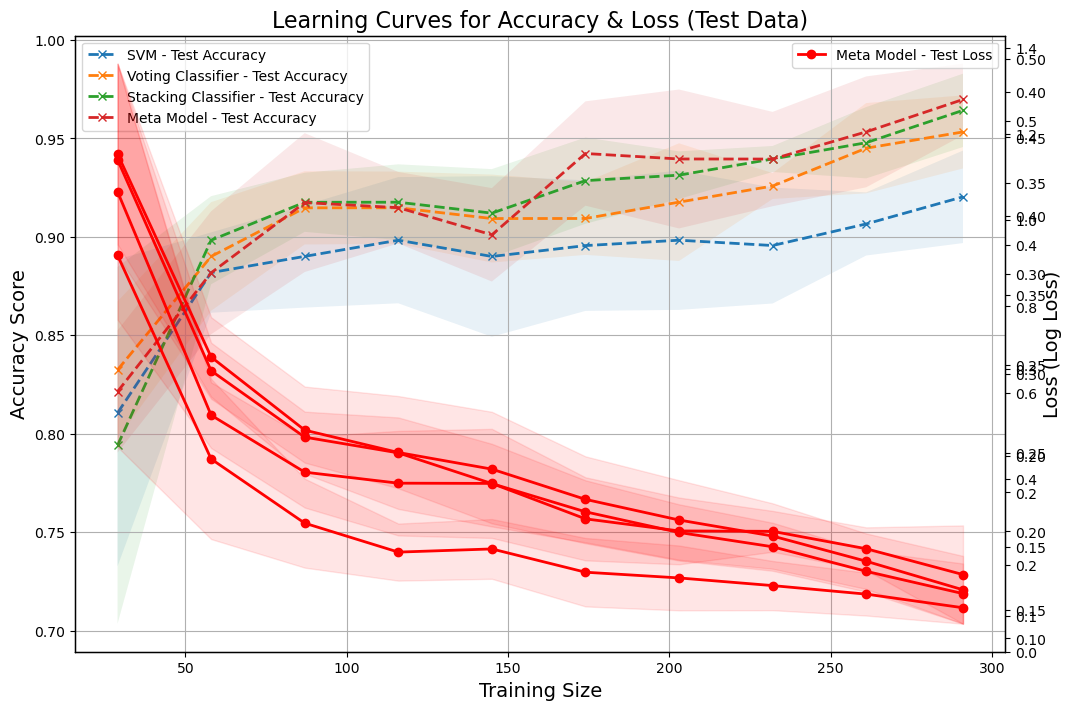

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import joblib  # Use joblib to load saved models

# Assuming you already have your dataset loaded as X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# List of model filenames (without Random Forest)
model_filenames = ['svm_model.pkl', 'voting_clf.pkl', 'stacking_clf.pkl', 'meta_model.pkl']
model_names = ['SVM', 'Voting Classifier', 'Stacking Classifier', 'Meta Model']

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Loop through the models to load, compute, and plot learning curves
for filename, model_name in zip(model_filenames, model_names):
    # Load the model
    model = joblib.load(filename)

    # Compute learning curves for accuracy
    train_sizes, train_scores_acc, test_scores_acc = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        scoring='accuracy'  # Accuracy metric
    )

    # Compute learning curves for loss (neg log loss)
    train_sizes, train_scores_loss, test_scores_loss = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        scoring='neg_log_loss'  # Log loss metric
    )

    # Calculate the mean and standard deviation for accuracy (test data)
    test_acc_mean = np.mean(test_scores_acc, axis=1)
    test_acc_std = np.std(test_scores_acc, axis=1)

    # Calculate the mean and standard deviation for loss (test data)
    test_loss_mean = -np.mean(test_scores_loss, axis=1)  # Neg log loss should be negated
    test_loss_std = np.std(test_scores_loss, axis=1)

    # Plot accuracy curve (test data)
    ax1.plot(train_sizes, test_acc_mean, label=f'{model_name} - Test Accuracy', 
             linestyle='--', marker='x', linewidth=2)

    # Highlight accuracy curve with standard deviation shaded area
    ax1.fill_between(train_sizes, test_acc_mean - test_acc_std, test_acc_mean + test_acc_std, alpha=0.1)

    # Plot loss curve (on the same plot) with right axis
    ax2 = ax1.twinx()  # instantiate a second y-axis that shares the same x-axis
    ax2.plot(train_sizes, test_loss_mean, label=f'{model_name} - Test Loss', 
             linestyle='-', marker='o', linewidth=2, color='red')

    # Highlight loss curve with standard deviation shaded area
    ax2.fill_between(train_sizes, test_loss_mean - test_loss_std, test_loss_mean + test_loss_std, 
                     alpha=0.1, color='red')

# Add labels and title
ax1.set_xlabel('Training Size', fontsize=14)
ax1.set_ylabel('Accuracy Score', fontsize=14)
ax2.set_ylabel('Loss (Log Loss)', fontsize=14)
plt.title('Learning Curves for Accuracy & Loss (Test Data)', fontsize=16)

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a grid
ax1.grid()

# Show the plot
plt.show()


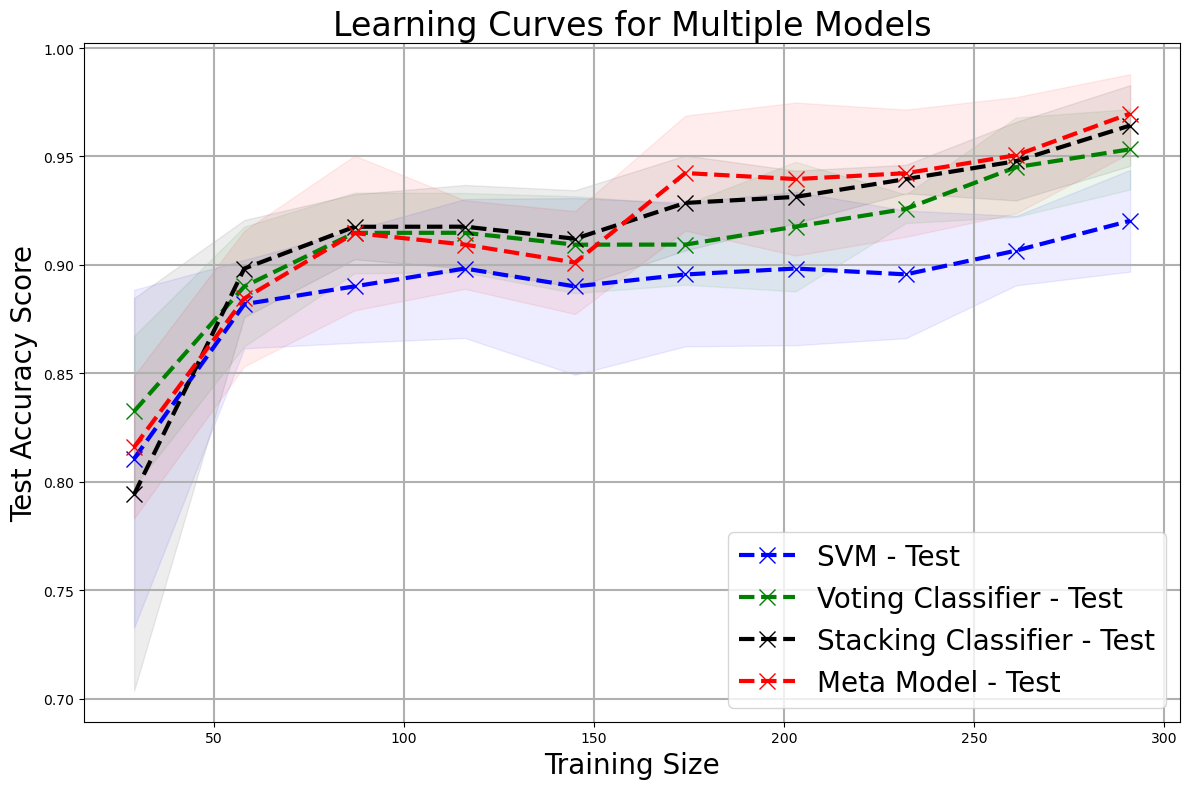

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import joblib  # Use joblib to load saved models

# Assuming you already have your dataset loaded as X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# List of model filenames (without Random Forest)
model_filenames = ['svm_model.pkl', 'voting_clf.pkl', 'stacking_clf.pkl', 'meta_model.pkl']
model_names = ['SVM', 'Voting Classifier', 'Stacking Classifier', 'Meta Model']

# Custom colors for the plot, ensuring 'red' is for 'Meta Model'
colors = ['blue', 'green', 'black', 'red']  # Red for Meta Model and orange instead of yellow

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through the models to load, compute, and plot learning curves
for filename, model_name, color in zip(model_filenames, model_names, colors):
    # Load the model
    model = joblib.load(filename)

    # Compute learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        scoring='accuracy'  # You can change this to other metrics if needed
    )

    # Calculate the mean and standard deviation for test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curves for test scores only with thicker dashed lines and basic colors
    plt.plot(train_sizes, test_scores_mean, label=f'{model_name} - Test',
             linestyle='--', marker='x', linewidth=3, markersize=12, color=color)

    # Plot the standard deviation as shaded areas in the same color
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.07, color=color)

# Add labels and title with larger fonts
plt.xlabel('Training Size', fontsize=20)
plt.ylabel('Test Accuracy Score', fontsize=20)
plt.title('Learning Curves for Multiple Models', fontsize=24)

# Set legend in the bottom-right position
plt.legend(loc='lower right', fontsize=20)

# Add a grid with stronger lines for visibility
plt.grid(True, linewidth=1.5)

# Show the plot
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

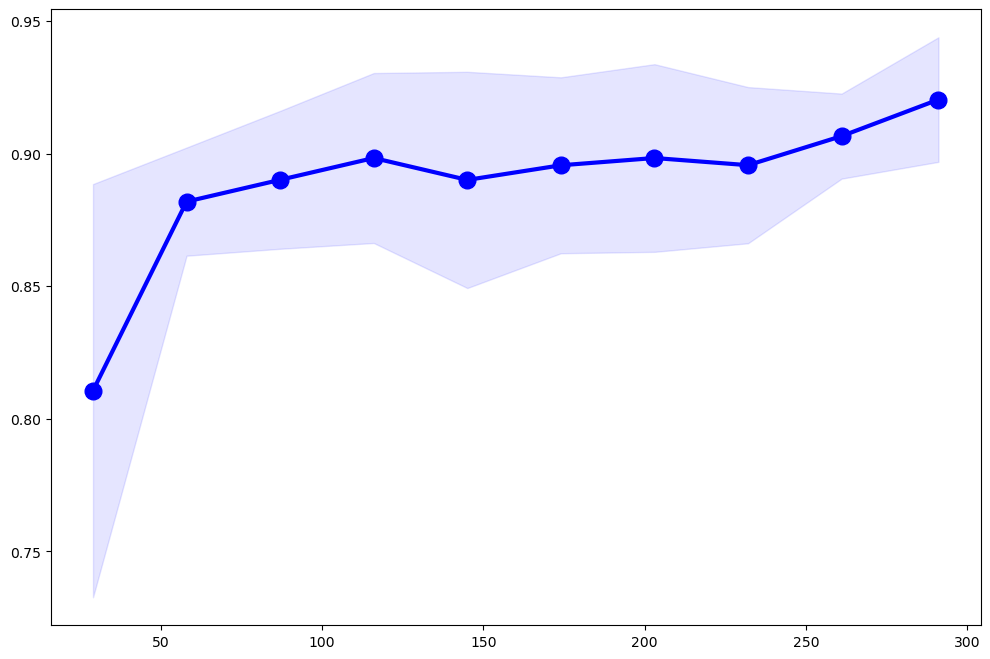

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import joblib  # Use joblib to load saved models

# Assuming you already have your dataset loaded as X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# List of model filenames (without Random Forest)
model_filenames = ['svm_model.pkl', 'voting_clf.pkl', 'stacking_clf.pkl', 'meta_model.pkl']
model_names = ['SVM', 'Voting Classifier', 'Stacking Classifier', 'Meta Model']

# Custom colors for the plot, ensuring 'red' is for 'Meta Model'
colors = ['blue', 'green', 'black', 'red']  # Red for Meta Model and orange instead of yellow

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through the models to load, compute, and plot learning curves
for filename, model_name, color in zip(model_filenames, model_names, colors):
    # Load the model
    model = joblib.load(filename)

    # Compute learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        scoring='accuracy'  # You can change this to other metrics if needed
    )

    # Calculate the mean and standard deviation for test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curves for test scores only with thicker dashed lines and basic colors
    plt.plot(train_sizes, test_scores_mean, label=f'{model_name} - Test',
             linestyle='-', marker='o', linewidth=3, markersize=12, color=color)

    # Plot the standard deviation as shaded areas in the same color
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color=color)

# Add labels and title with larger fonts
plt.xlabel('Training Size', fontsize=20)
plt.ylabel('Test Accuracy Score', fontsize=20)
plt.title('Learning Curves for Multiple Models', fontsize=24)

# Set legend in the bottom-right position
plt.legend(loc='lower right', fontsize=20)

# Add a grid with stronger lines for visibility
plt.grid(True, linewidth=1.5)

# Show the plot
plt.tight_layout()
plt.show()
